In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=22)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [7]:
train_target = pd.read_csv('../data/clients.csv')

In [8]:
train_target['gender'] = train_target['gender'].map({'F': '0', 'M': '1'})
#
train_target['age'] = pd.to_numeric(train_target['age'])
train_target['age'] = np.where(
    (train_target['age'] < 10) | (train_target['age'] > 90), None, train_target['age'])

#
train_target['age_bin'] = np.where(
    (train_target['age'] < 10) | (train_target['age'] > 90), None, np.where(
        train_target['age'] < 35, '0', np.where(
            train_target['age'] < 45, '1', np.where(
                train_target['age'] < 60, '2', '3'))))

In [9]:
train_target.head(5)

,client_id,first_issue_date,first_redeem_date,age,gender,age_bin
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,NaN,2
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,0,3
2,000048b7a6,2018-12-15 13:33:11,NaN,68,0,3
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,0,3
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,NaN,3


In [10]:
df_vectors = pd.read_pickle('../data/mles_embeddings.pickle').set_index('client_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('client_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v795,v796,v797,v798,v799,first_issue_date,first_redeem_date,age,gender,age_bin
client_id,,,,,,,,,,,,,,,,,,,,,
001ecff0a8,-0.395146,0.000559,0.112225,-0.095106,-0.048269,-0.011468,0.024140,0.155494,0.002044,0.005313,...,-0.003035,0.379830,-0.002059,-0.580241,0.001396,2017-09-10 20:45:12,2017-12-09 15:38:15,27,1,0
0026cb3bce,-0.009864,0.005177,0.198159,-0.058585,0.016845,-0.009070,-0.041039,-0.002607,0.003222,0.004800,...,-0.002219,0.701572,-0.005299,-0.797241,-0.000924,2017-04-24 17:54:18,2018-10-18 15:01:27,25,NaN,0
006391ff01,0.005361,0.001490,0.130657,-0.035013,-0.086364,-0.004530,0.006276,-0.067907,0.004508,0.004393,...,0.001468,0.763264,-0.003004,-0.840574,0.000560,2019-01-16 21:41:44,2019-01-19 15:40:32,20,NaN,0
0068dd084d,0.079178,0.001304,-0.036186,-0.117103,-0.021436,-0.004174,0.081384,0.160443,0.003907,0.005019,...,-0.002268,0.688018,-0.004600,-0.719949,-0.001044,2017-06-27 21:28:07,2019-05-20 17:15:42,28,1,0
00744e0a90,0.063900,0.001630,0.015166,-0.012281,0.160103,-0.001515,-0.008170,0.044951,0.002966,0.002893,...,-0.005360,0.748157,-0.006153,-0.279396,-0.001795,2017-07-26 14:25:11,2017-09-07 21:46:23,61,0,3


In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
df_pca = df_vectors.copy()

In [13]:
pca = PCA(n_components=2)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.1974246225404806

In [14]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]

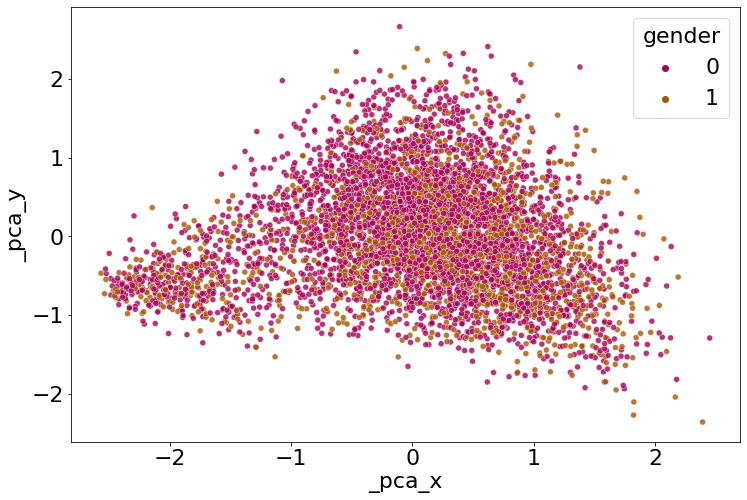

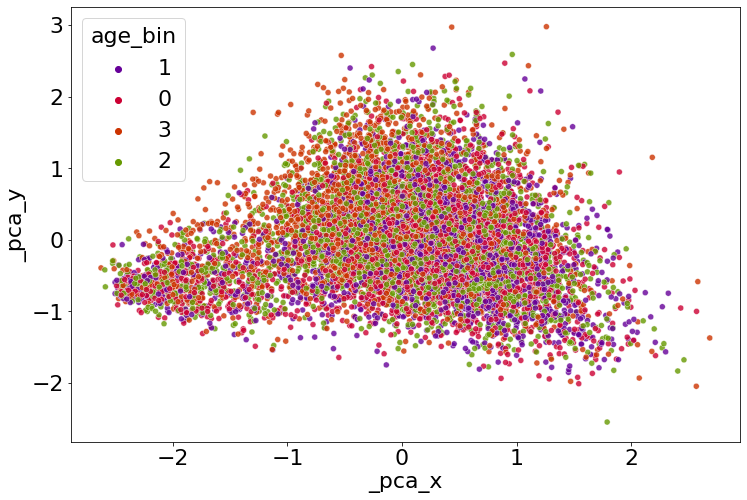

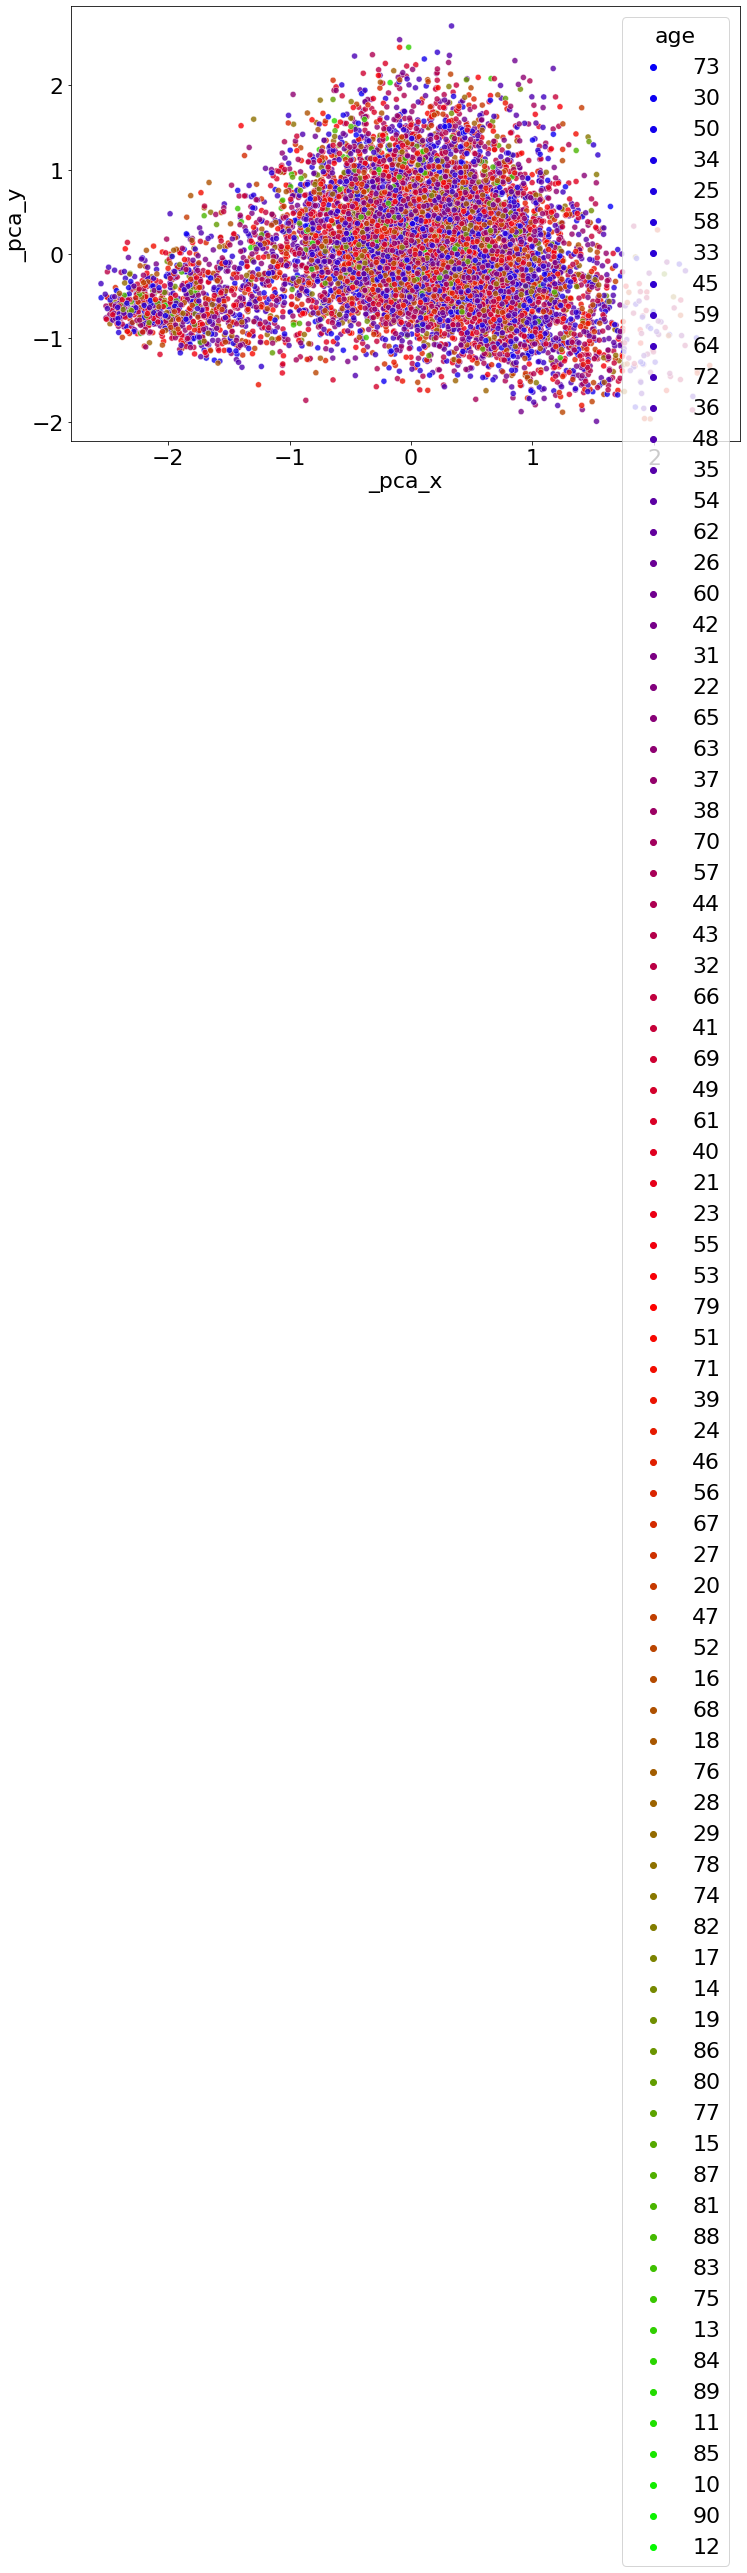

In [15]:
for col_target in ['gender', 'age_bin', 'age']:
    _, axs = plt.subplots(1, 1, figsize=(12, 8))
    sns.scatterplot(
        x='_pca_x', y='_pca_y',
        hue=col_target,
        # style='bins',
        data=df_pca.sample(n=10000),
        palette='brg',
        alpha=0.8,
        ax=axs,
        markers=['o', 'd', '*' , '.']
    )
    plt.show()

In [20]:
if len(df_pca) > 40000:
    df_tsne = df_pca.sample(n=40000).copy()
else:
    df_tsne = df_pca.copy()

In [30]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300, metric='cosine', perplexity=5)
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.020s...
[t-SNE] Computed neighbors for 40000 samples in 28.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sa

In [31]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

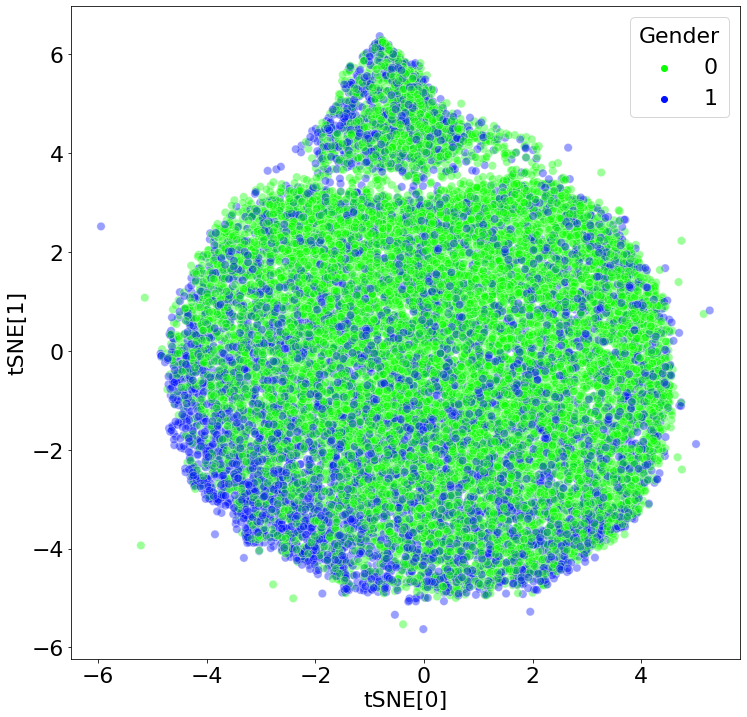

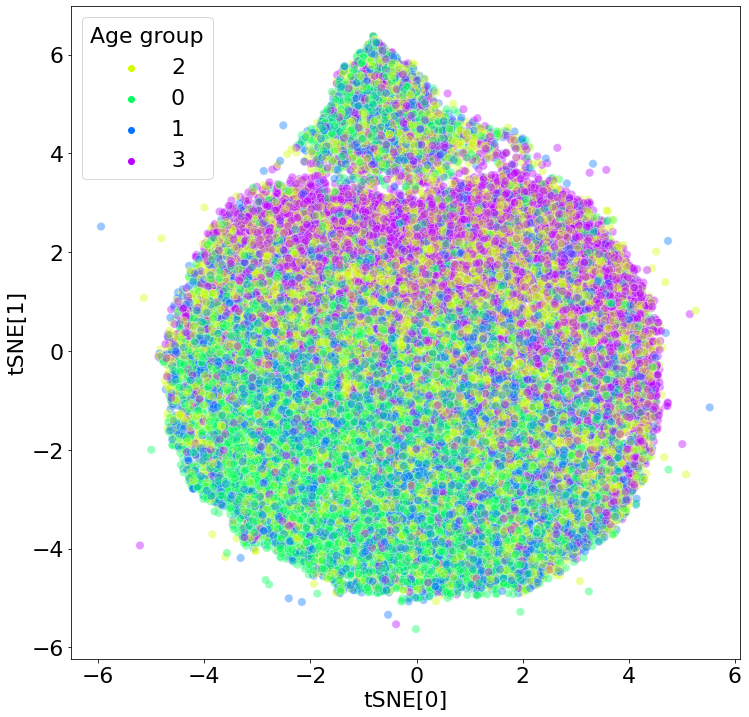

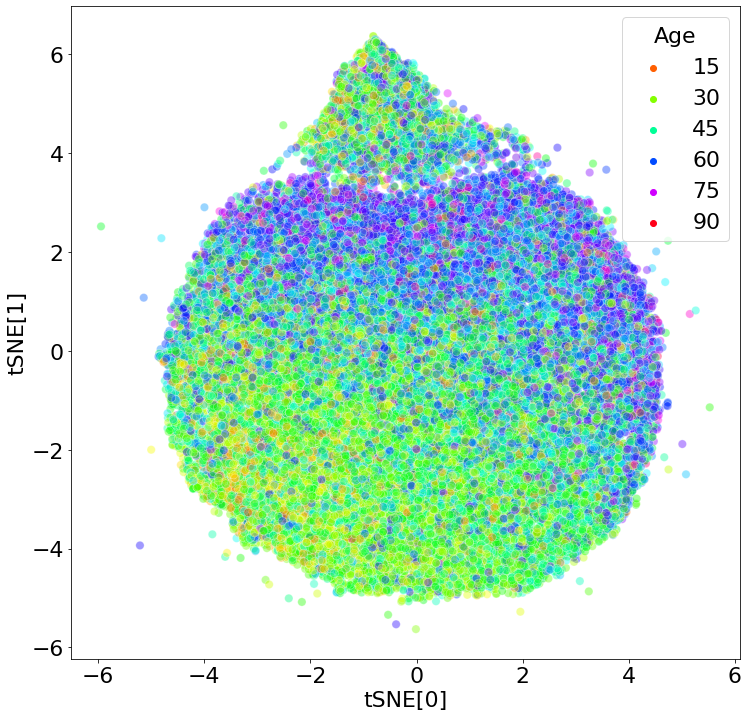

In [33]:
for col_target, col_name, palette in zip(
    ['gender', 'age_bin', 'age'],
    ['Gender', 'Age group', 'Age'],
    ['hsv', 'hsv', 'hsv']  #'gnuplot2'
):
    _, axs = plt.subplots(1, 1, figsize=(12, 12))
    sns.scatterplot(
        x='tSNE[0]', y='tSNE[1]',
        hue=col_name,
        data=df_tsne[lambda x: ~x[col_target].isna()].rename(columns={col_target: col_name}),
        palette=palette,
        alpha=0.4, s=70,
        ax=axs,
    )
    # plt.show()

    plt.savefig(f'iclr-x5-tsne-{col_target}.pdf')